# HEART FAILURE PREDICTION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.shape

(918, 12)

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [7]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          289          0           1   
1     21    0              2         55          180          0           1   
2      9    1              1         31          283          0           2   
3     20    0              0         39          214          0           1   
4     26    1              2         49          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          264          0           1   
914   40    1              0         45          193          1           1   
915   29    1              0         31          131          0           1   
916   29    0              1         31          236          0           0   
917   10    1              2         39          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

# Scaling the Data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print(X_test)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
900   30    1              0         17          318          0           2   
570   28    1              0         29          223          0           2   
791   23    1              0         41          298          0           1   
189   25    1              0         62          285          0           2   
372   35    1              0         63            0          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
880   24    1              2         59          199          1           1   
110   31    0              1         31          188          0           1   
120   19    0              2         36          248          1           1   
306   27    1              0         18            0          1           1   
889   31    1              3         35          204          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
900

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_dist_logr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 1000),
    'solver': ['liblinear', 'saga']
}

logistic_regression = LogisticRegression()

random_search_logr = RandomizedSearchCV(estimator = logistic_regression, param_distributions= param_dist_logr, n_iter=50, cv=5)
random_search_logr.fit(X_train, y_train)

best_logr = random_search_logr.best_estimator_
print(best_logr)
y_pred_logr = best_logr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_logr))
print('Accuracy: ', accuracy_score(y_test, y_pred_logr))
print('Precision: ', precision_score(y_test, y_pred_logr,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_logr,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_logr,average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegression(C=758.367791499719, solver='liblinear')
[[ 77  12]
 [ 15 126]]
Accuracy:  0.8826086956521739
Precision:  0.8836011342155008
Recall:  0.8826086956521739
f1 score:  0.8829504157206728


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_knn))
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_knn,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_knn,average='weighted'))

[[ 61  28]
 [ 40 101]]
Accuracy:  0.7043478260869566
Precision:  0.7136861916727567
Recall:  0.7043478260869566
f1 score:  0.707114162217137


# Decision Tree

Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)
[[ 72  17]
 [ 17 124]]
Accuracy:  0.8521739130434782
Precision:  0.8521739130434782
Recall:  0.8521739130434782
f1 score:  0.8521739130434782


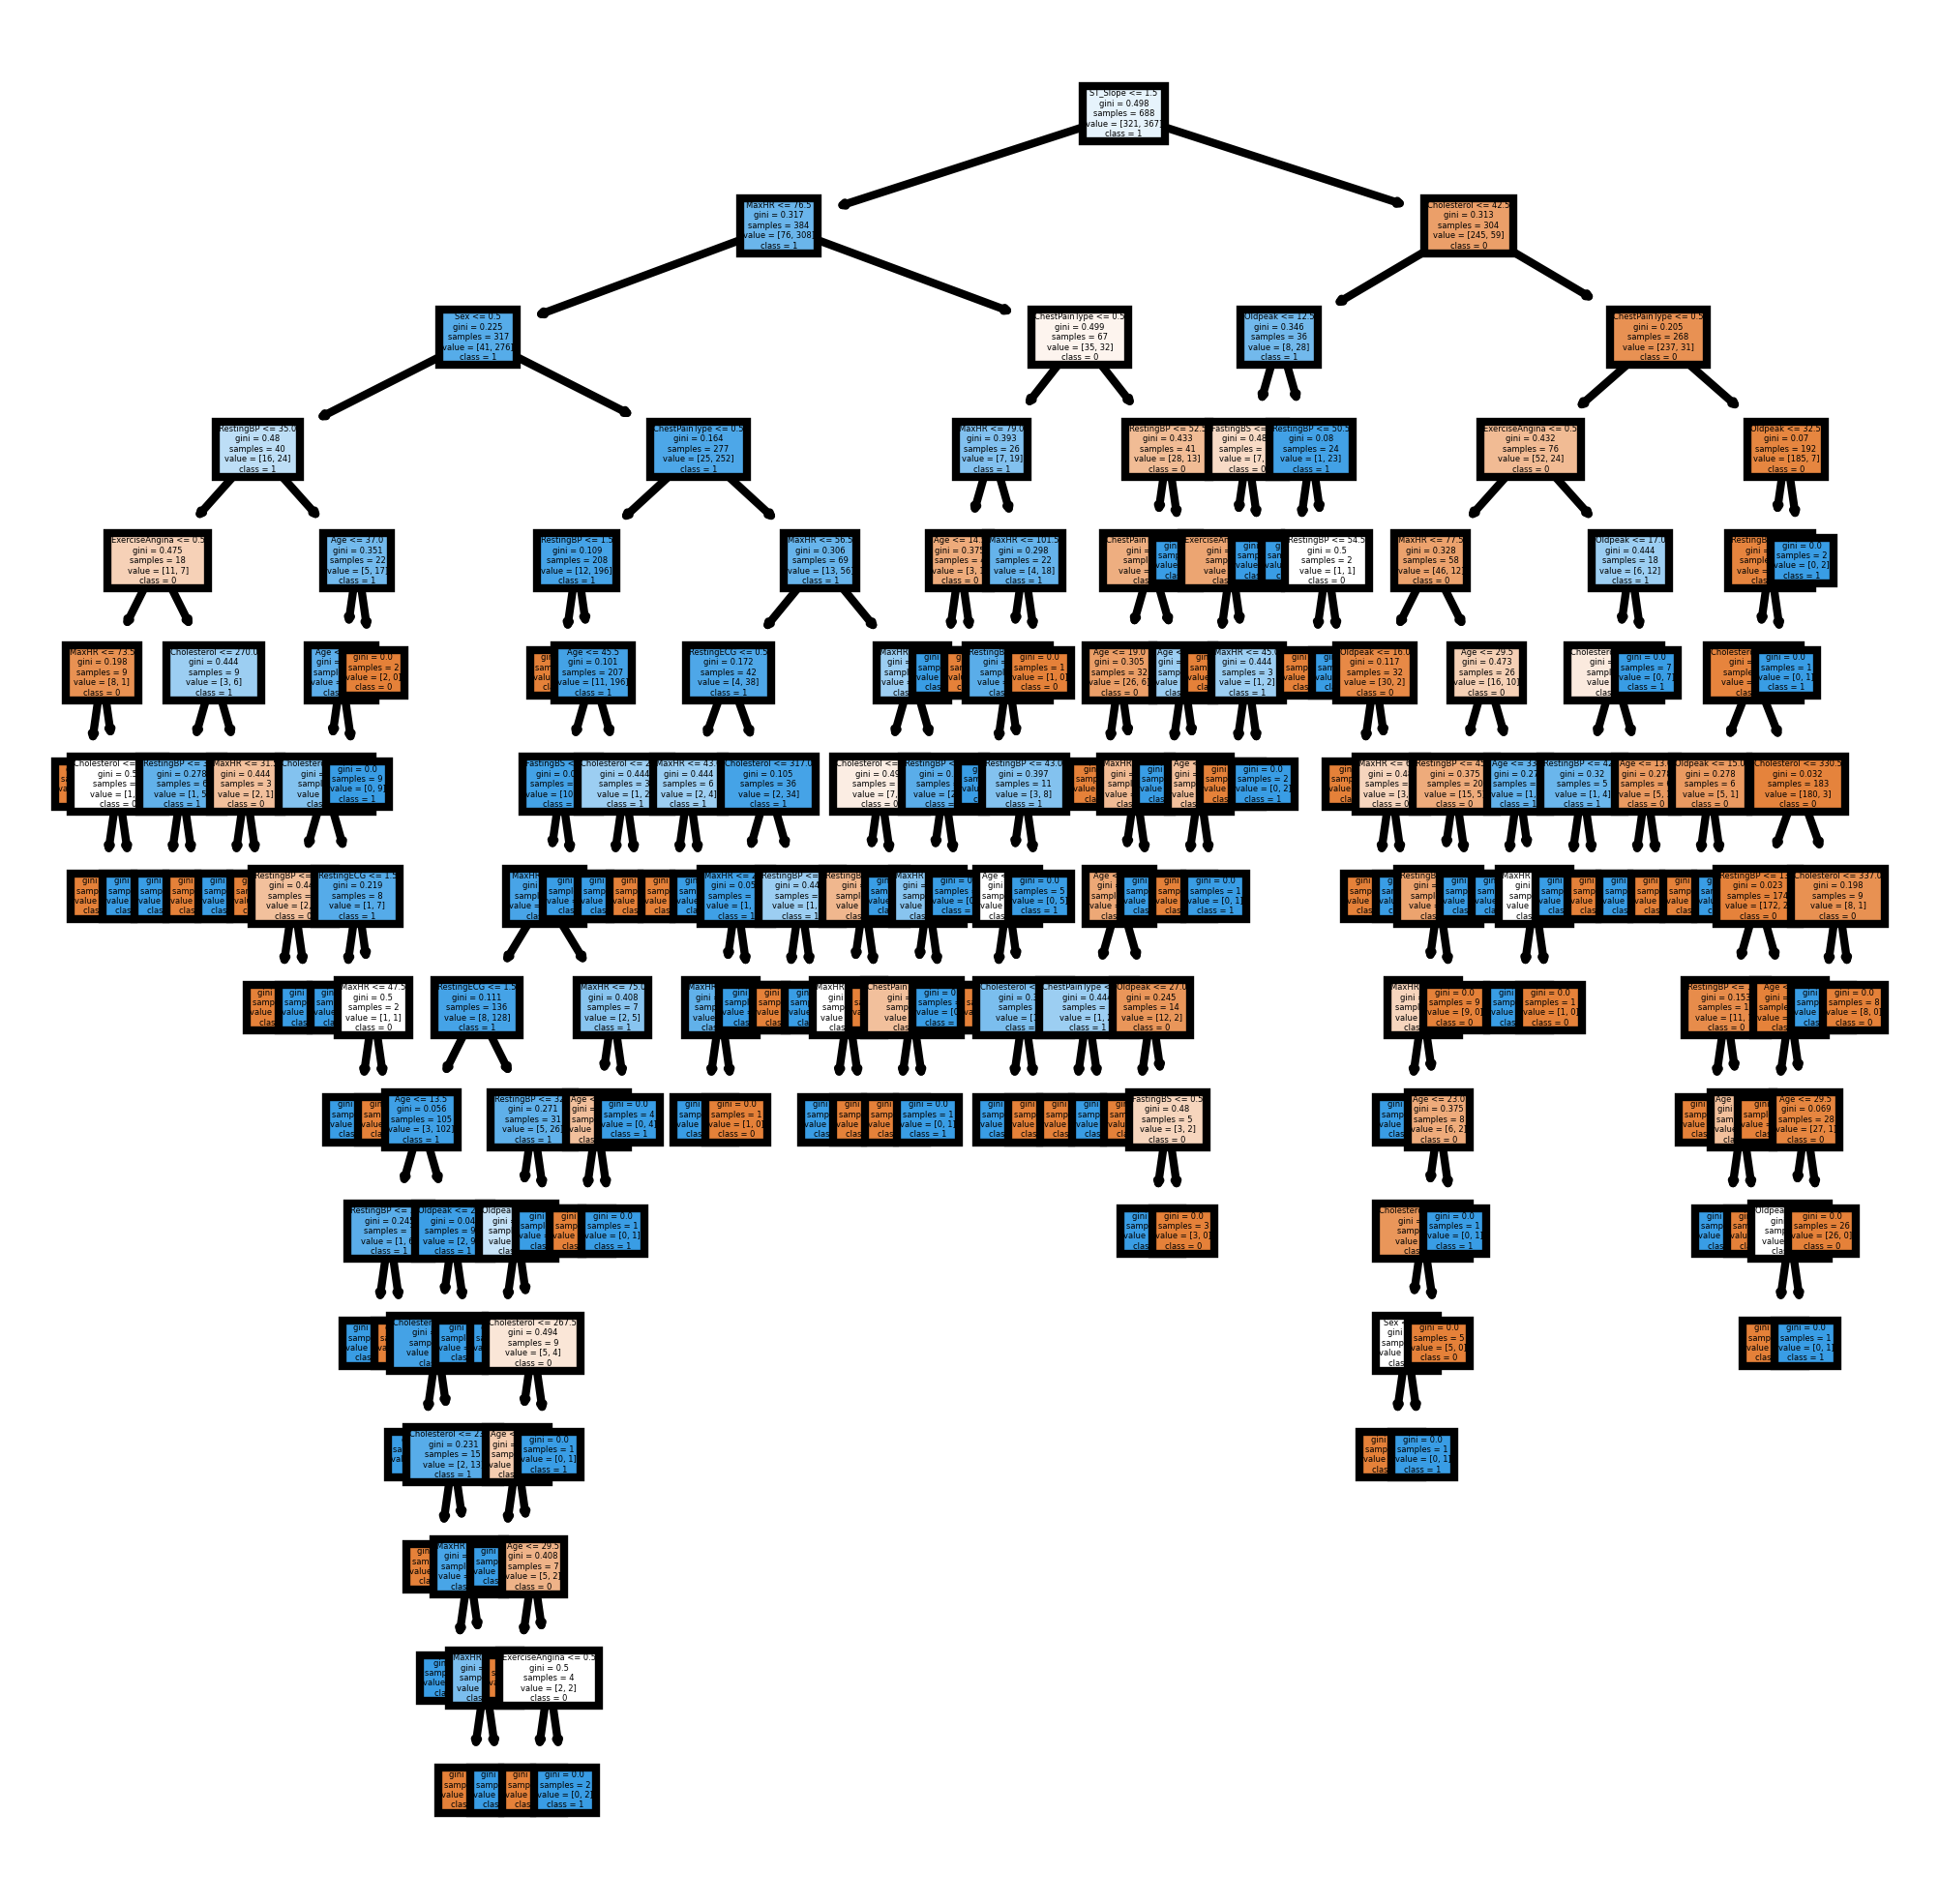

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

randomised_search_dt = RandomizedSearchCV(estimator = dtree, param_distributions = parameters_dtree, cv = 5, verbose = 1, n_jobs = -1, n_iter = 100)
randomised_search_dt.fit(X_train, y_train)

best_dt = randomised_search_dt.best_estimator_
print(best_dt)
y_pred_dt = best_dt.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_dt))
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_dt,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_dt,average='weighted'))

#Visualizing the tree
from sklearn.tree import plot_tree
fn=list(X_train)
cn=['0','1']
plt.figure(figsize=(4,4),dpi=600)
plot_tree(dtree,feature_names=fn,class_names=cn,filled=True);

# SVM

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.01)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[ 76  13]
 [ 19 122]]
0.8608695652173913
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        89
           1       0.90      0.87      0.88       141

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



# Random Forest Classifier(Bagging)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parameters_rf = {
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier()

#Manual Hyperparameter Tuning
rf_manual = RandomForestClassifier()
rf_manual.fit(X_train, y_train)
y_pred_mrf = rf_manual.predict(X_test)

from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_mrf))
print('Accuracy: ', accuracy_score(y_test, y_pred_mrf))
print('Precision: ', precision_score(y_test, y_pred_mrf,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_mrf,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_mrf,average='weighted'))
print(classification_report(y_test, y_pred_mrf))

#randomized search
randomised_search_rf = RandomizedSearchCV(estimator = rf_classifier, param_distributions = parameters_rf, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
randomised_search_rf.fit(X_train, y_train)

best_rf = randomised_search_rf.best_estimator_
print(best_rf)
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_rf))
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_rf,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_rf,average='weighted'))
print(classification_report(y_test, y_pred_rf))


#grid Search
grid_parameters_rf = {
    'n_estimators': [65, 69, 73, 77, 81],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [20, 25, 30, 35, 40],
    'min_samples_split': [3, 4, 5, 6, 7],
    'min_samples_leaf': [2, 3],
    'bootstrap': [False]
}
grid_search_rf = GridSearchCV(estimator = rf_classifier, param_grid = grid_parameters_rf, cv = 3, verbose=2, n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

best_grid_rf = grid_search_rf.best_estimator_
print(best_grid_rf)
y_pred_grf = best_grid_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_grf))
print('Accuracy: ', accuracy_score(y_test, y_pred_grf))
print('Precision: ', precision_score(y_test, y_pred_grf,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_grf,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_grf,average='weighted'))
print(classification_report(y_test, y_pred_grf))

[[ 77  12]
 [ 17 124]]
Accuracy:  0.8739130434782608
Precision:  0.8759264297763509
Recall:  0.8739130434782608
f1 score:  0.8744975739626192
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        89
           1       0.91      0.88      0.90       141

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=178)
[[ 77  12]
 [ 15 126]]
Accuracy:  0.8826086956521739
Precision:  0.8836011342155008
Recall:  0.8826086956521739
f1 score:  0.8829504157206728
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        89
           1       0.91      0.89      0.90       141

    accuracy                           0.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_depth=30, max_features='auto',
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=69)
[[ 76  13]
 [ 15 126]]
Accuracy:  0.8782608695652174
Precision:  0.8788809563911222
Recall:  0.8782608695652174
f1 score:  0.8785024154589373
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        89
           1       0.91      0.89      0.90       141

    accuracy                           0.88       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230



# Boosting Algorithms

Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate = 0.1)
gradient_booster.fit(X_train, y_train)
y_pred_gradboost = gradient_booster.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_gradboost))
print('Accuracy: ', accuracy_score(y_test, y_pred_gradboost))
print('Precision: ', precision_score(y_test, y_pred_gradboost,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_gradboost,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_gradboost,average='weighted'))

[[ 78  11]
 [ 18 123]]
Accuracy:  0.8739130434782608
Precision:  0.8771211875405581
Recall:  0.8739130434782608
f1 score:  0.8746937293024251


Adaptive Boosting

In [19]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
ada = abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_abc))
print('Accuracy: ', accuracy_score(y_test, y_pred_abc))
print('Precision: ', precision_score(y_test, y_pred_abc,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_abc,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_abc,average='weighted'))

[[ 81   8]
 [ 19 122]]
Accuracy:  0.8826086956521739
Precision:  0.888752508361204
Recall:  0.8826086956521739
f1 score:  0.8836423643739544


XGBoosting

In [20]:
pip install xgboost

In [21]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform both y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train your XGBoost model and make predictions
xgmodel = XGBClassifier(learning_rate=1)
xgmodel.fit(X_train, y_train_encoded)
y_pred_xgb = xgmodel.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix(y_test_encoded, y_pred_xgb))
print('Accuracy: ', accuracy_score(y_test_encoded, y_pred_xgb))
print('Precision: ', precision_score(y_test_encoded, y_pred_xgb, average='weighted'))
print('Recall: ', recall_score(y_test_encoded, y_pred_xgb, average='weighted'))
print('f1 score: ', f1_score(y_test_encoded, y_pred_xgb, average='weighted'))



[[ 76  13]
 [ 25 116]]
Accuracy:  0.8347826086956521
Precision:  0.8424391074092242
Recall:  0.8347826086956521
f1 score:  0.836328502415459


CatBoost

In [22]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.8 MB/s eta 0:00:00


In [23]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_m2 = cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, y_pred_cat))
print('Accuracy: ', accuracy_score(y_test, y_pred_cat))
print('Precision: ', precision_score(y_test, y_pred_cat,average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_cat,average='weighted'))
print('f1 score: ', f1_score(y_test, y_pred_cat,average='weighted'))

Learning rate set to 0.008782
0:	learn: 0.6840345	total: 48.1ms	remaining: 48s
1:	learn: 0.6772603	total: 49.7ms	remaining: 24.8s
2:	learn: 0.6693436	total: 51ms	remaining: 17s
3:	learn: 0.6619502	total: 52.4ms	remaining: 13.1s
4:	learn: 0.6536508	total: 53.8ms	remaining: 10.7s
5:	learn: 0.6465085	total: 55.3ms	remaining: 9.15s
6:	learn: 0.6398670	total: 56.6ms	remaining: 8.03s
7:	learn: 0.6344126	total: 57.8ms	remaining: 7.17s
8:	learn: 0.6273361	total: 59.2ms	remaining: 6.51s
9:	learn: 0.6201148	total: 60.8ms	remaining: 6.01s
10:	learn: 0.6141436	total: 62.1ms	remaining: 5.58s
11:	learn: 0.6078660	total: 63.5ms	remaining: 5.23s
12:	learn: 0.6014812	total: 64.8ms	remaining: 4.92s
13:	learn: 0.5952622	total: 66.3ms	remaining: 4.67s
14:	learn: 0.5898165	total: 67.7ms	remaining: 4.45s
15:	learn: 0.5845863	total: 69.1ms	remaining: 4.25s
16:	learn: 0.5800849	total: 70.3ms	remaining: 4.06s
17:	learn: 0.5747749	total: 71.8ms	remaining: 3.92s
18:	learn: 0.5714617	total: 72.8ms	remaining: 3.76

# Ensemble

In [24]:
from sklearn.ensemble import RandomForestClassifier

X = np.array([y_pred_dt, y_pred_svm, y_pred_logr, y_pred_knn]).T

meta_learner = RandomForestClassifier()
meta_learner2 = meta_learner.fit(X, y_test)
ensemble_predictions = meta_learner.predict(X)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, ensemble_predictions))
print('Accuracy: ', accuracy_score(y_test, ensemble_predictions))
print('Precision: ', precision_score(y_test, ensemble_predictions,average='weighted'))
print('Recall: ', recall_score(y_test, ensemble_predictions,average='weighted'))
print('f1 score: ', f1_score(y_test, ensemble_predictions,average='weighted'))

[[ 79  10]
 [ 16 125]]
Accuracy:  0.8869565217391304
Precision:  0.8894177472667175
Recall:  0.8869565217391304
f1 score:  0.8875708884688089


In [25]:
print(y_pred_rf.shape)
print(y_pred_xgb.shape)
print(y_pred_cat.shape)
print(y_pred_abc.shape)
print(y_pred_gradboost.shape)


(230,)
(230,)
(230,)
(230,)
(230,)


In [38]:
from sklearn.ensemble import RandomForestClassifier

X = np.array([y_pred_rf, y_pred_xgb, y_pred_abc, y_pred_gradboost]).T

meta_learner = RandomForestClassifier()
meta_learner2 = meta_learner.fit(X, y_test)
ensemble_predictions = meta_learner.predict(X)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, ensemble_predictions))
print('Accuracy: ', accuracy_score(y_test, ensemble_predictions))
print('Precision: ', precision_score(y_test, ensemble_predictions,average='weighted'))
print('Recall: ', recall_score(y_test, ensemble_predictions,average='weighted'))
print('f1 score: ', f1_score(y_test, ensemble_predictions,average='weighted'))

[[ 80   9]
 [ 16 125]]
Accuracy:  0.8913043478260869
Precision:  0.8943326844040668
Recall:  0.8913043478260869
f1 score:  0.891977352846918


In [39]:
from sklearn.ensemble import RandomForestClassifier

X = np.array([y_pred_dt, y_pred_svm]).T

meta_learner = RandomForestClassifier()
meta_learner2 = meta_learner.fit(X, y_test)
ensemble_predictions = meta_learner.predict(X)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(confusion_matrix(y_test, ensemble_predictions))
print('Accuracy: ', accuracy_score(y_test, ensemble_predictions))
print('Precision: ', precision_score(y_test, ensemble_predictions,average='weighted'))
print('Recall: ', recall_score(y_test, ensemble_predictions,average='weighted'))
print('f1 score: ', f1_score(y_test, ensemble_predictions,average='weighted'))

[[ 70  19]
 [ 11 130]]
Accuracy:  0.8695652173913043
Precision:  0.8692770194569631
Recall:  0.8695652173913043
f1 score:  0.8682952641326396


# LIME and SHAP

In [27]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=cd833ca6aa050af1a059b3d5e5b72a180e4d6916fd613504dd5ecb0680d5076f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [28]:
pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.8/651.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=72442efcf21c552bdf001e50331bbc174cb30d3e39bba1ac78dd74f2e6f780f4
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl siz

Adaptive Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


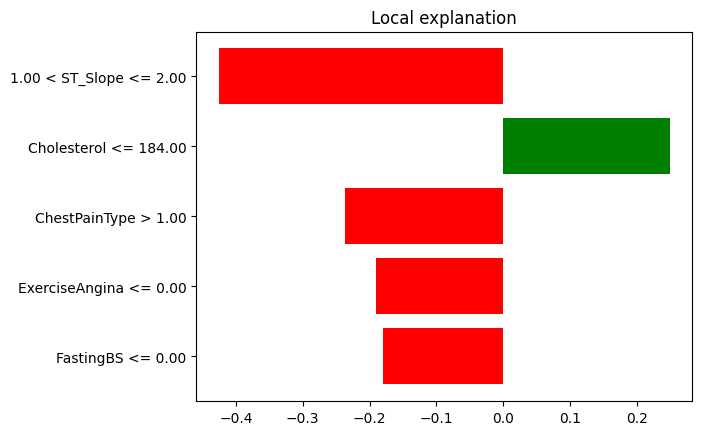

In [29]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_test.values, feature_names=X_test.columns, class_names=['Recurred','Not Recurred'], mode = 'regression')

exp = explainer.explain_instance(X_train.values[50], abc.predict, num_features=5)

exp.as_pyplot_figure();

In [30]:
exp.show_in_notebook(show_table  = True)

In [31]:
from shapash.explainer.smart_explainer import SmartExplainer

xpl = SmartExplainer(ada)
xpl.compile(x = X_test)
xpl.plot.features_importance()

INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 231it [02:36,  1.47it/s]


In [32]:
import random
subset = random.choices(X_test.index, k=50)
xpl.plot.features_importance(selection=subset)

In [33]:
## Local Explanation
xpl.plot.local_plot(index = random.choice(X_test.index))

Ensemble

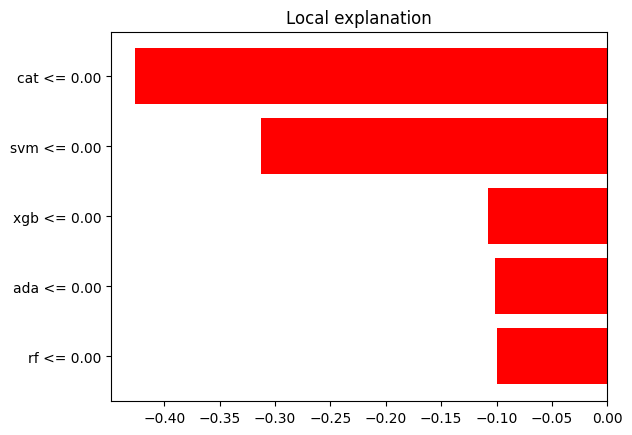

In [34]:
from lime.lime_tabular import LimeTabularExplainer
y_pred_dt, y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_cat, y_pred_abc, y_pred_gradboost
explainer = LimeTabularExplainer(X, feature_names=['dt', 'svm', 'rf', 'xgb', 'cat', 'ada', 'gradboost'], mode = 'regression')

exp = explainer.explain_instance(X[50], meta_learner.predict, num_features=5)

exp.as_pyplot_figure();

In [35]:
exp.show_in_notebook(show_table  = True)

In [36]:
from shapash.explainer.smart_explainer import SmartExplainer

xpl = SmartExplainer(meta_learner2)
xpl.compile(x = X_test)
xpl.plot.features_importance()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7e18e6440460>


In [37]:
import random
subset = random.choices(X_test.index, k=50)
xpl.plot.features_importance(selection=subset)